In [1]:
library(ggplot2)#!/usr/bin/env Rscript
library(ggpubr)
library(ggrepel)
library(cowplot)
library(plotly)
library(ggpmisc)
library(devtools)
library(dplyr)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘ggpmisc’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




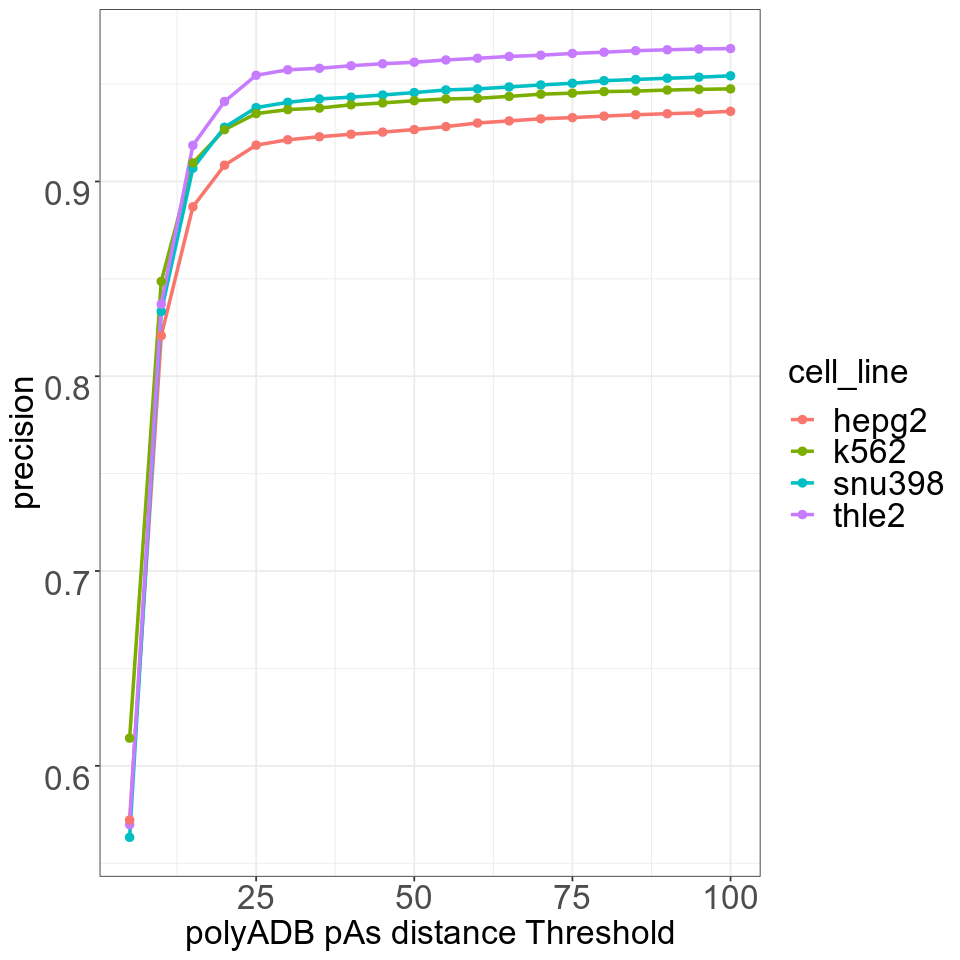

In [93]:
dist_data=read.table("coverage_data/stat.dist.txt",header=TRUE)
ggplot(data=dist_data,aes(x=dist,y=precision,group=cell_line,colour=cell_line))+
geom_line(size=1)+
geom_point(size=2)+
scale_x_continuous(breaks = seq(0,100,by =25))+
theme_bw()+
#theme(legend.position = c(0.89,0.8))+
labs(x="polyADB pAs distance Threshold")+
theme(axis.title=element_text(size=20),
          axis.text=element_text(size=20,vjust=1,hjust=0.5,angle=0),
          legend.title=element_text(size=20,color="black"),
          legend.text=element_text(size=20,color="black"))

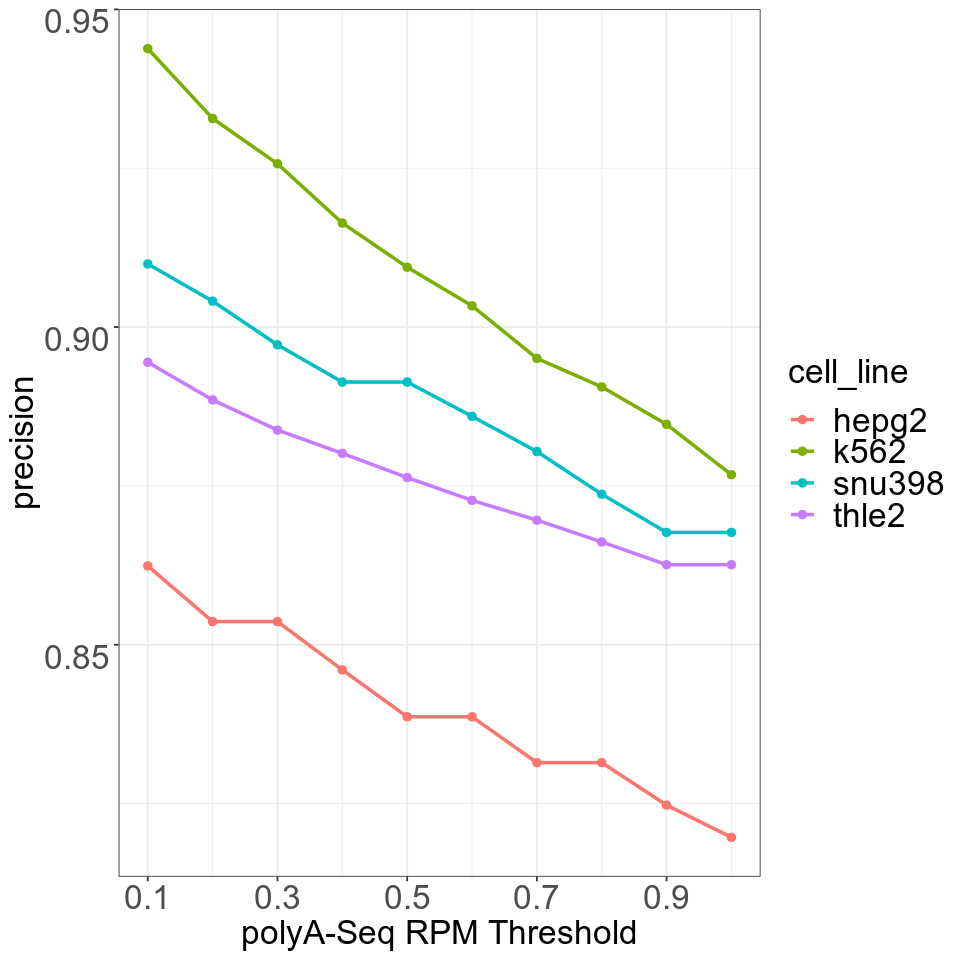

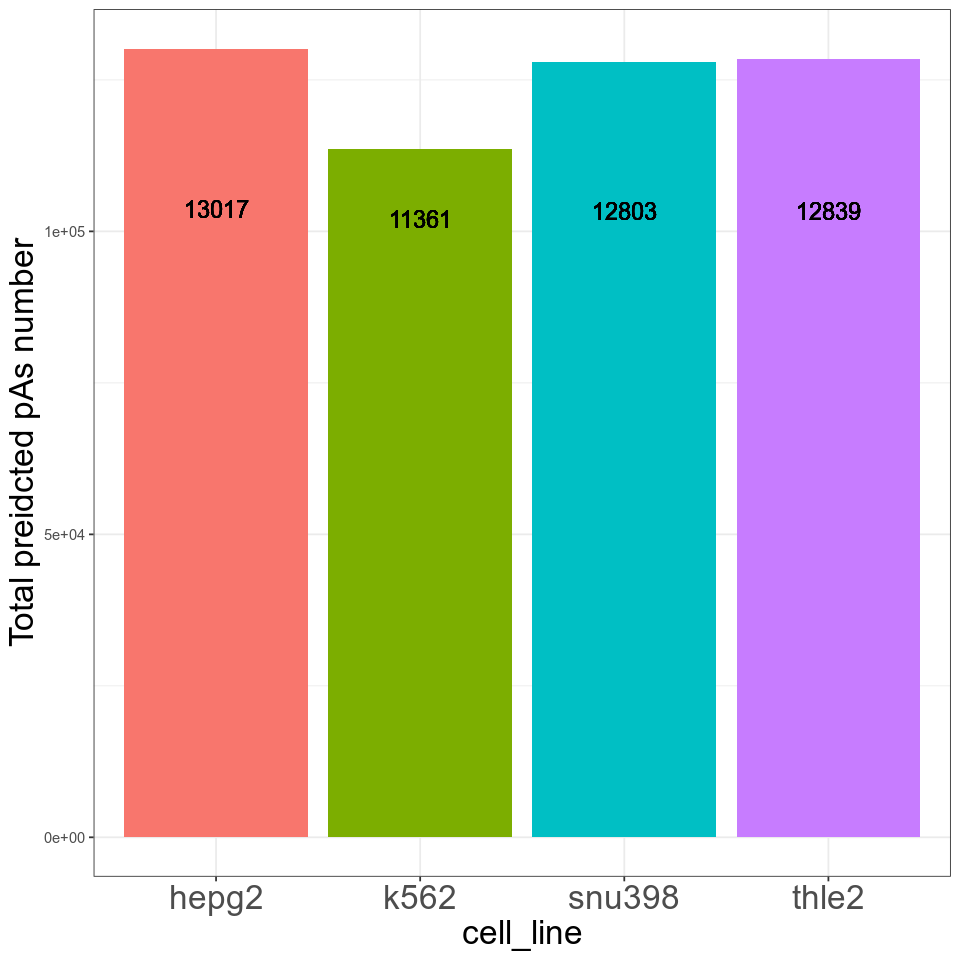

In [89]:
rpm=read.table("coverage_data/stat.polyArpm.txt",header=TRUE)
ggplot(data=rpm,aes(x=RPM,y=precision,group=cell_line,colour=cell_line))+
geom_line(size=1)+
geom_point(size=2)+
scale_x_continuous(breaks = seq(0.1,1,by =0.2))+
theme_bw()+
#theme(legend.position = c(0.89,0.8))+
labs(x="polyA-Seq RPM Threshold")+
theme(axis.title=element_text(size=20),
          axis.text=element_text(size=20,vjust=1,hjust=0.5,angle=0),
          legend.title=element_text(size=20,color="black"),
          legend.text=element_text(size=20,color="black"))

ggplot(data=rpm,aes(x=cell_line,y=total,fill=cell_line))+
#geom_col()+
geom_bar(stat="identity")+
geom_text(size=5,stat="identity",aes(y=total,label= total), vjust=-30)+
theme_bw()+
labs(y="Total preidcted pAs number")+
theme(axis.title=element_text(size=20),
          axis.text.x=element_text(size=20,vjust=1,hjust=0.5,angle=0),
          legend.position = "none")

In [2]:
roc = read.table('MaxPoint.thround5.txt',header=T)

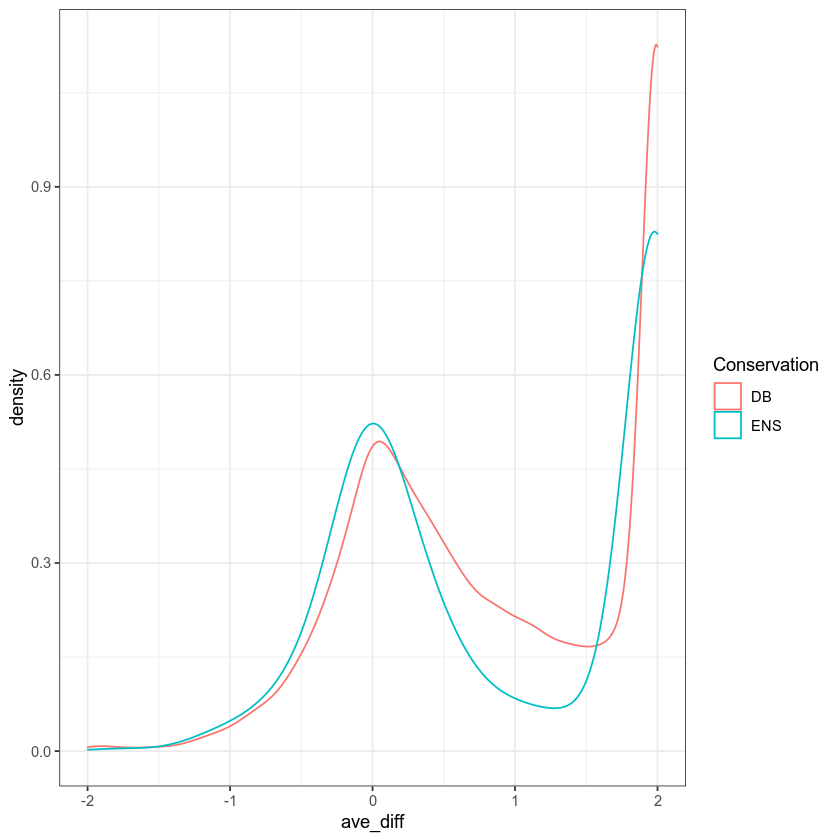

In [3]:
diff_data = read.table("usage_data/THLE2_Control.pAs.usage.txt",header=T)
ggplot(data=diff_data,aes(x=ave_diff,group=Conservation,colour=Conservation))+geom_density()+
#ggplot(data=roc,aes(x=maxPoint))+geom_density()+
#geom_vline(xintercept = 9)+
theme_bw()
#theme(legend.position = c(0.89,0.8)) 

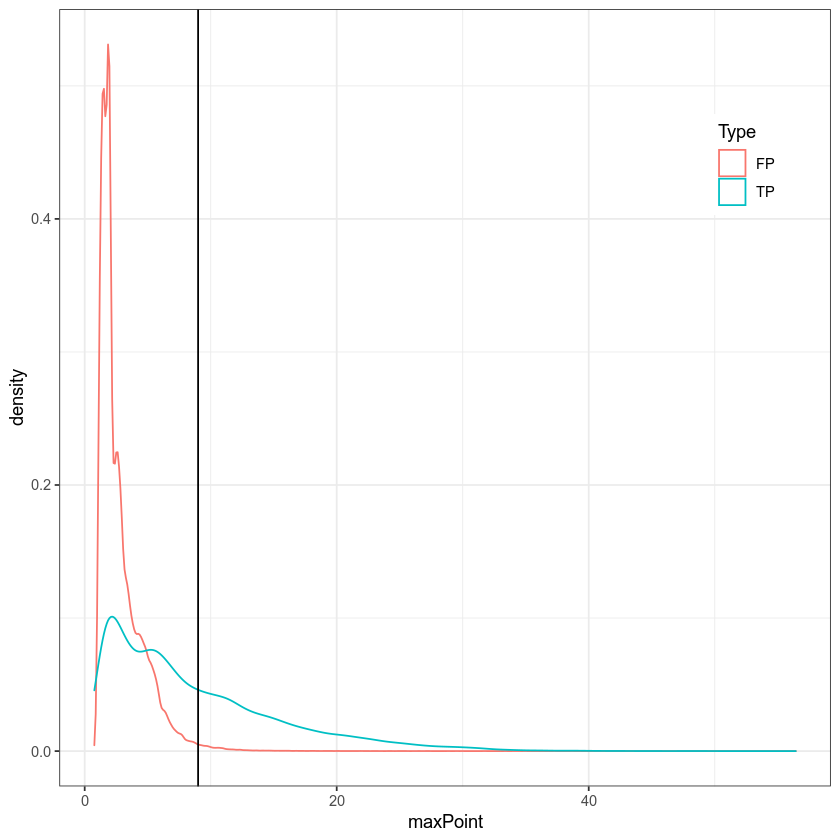

In [4]:
ggplot(data=roc,aes(x=maxPoint,group=Type,colour=Type))+geom_density()+
#ggplot(data=roc,aes(x=maxPoint))+geom_density()+
geom_vline(xintercept = 9)+
theme_bw()+
theme(legend.position = c(0.89,0.8)) 

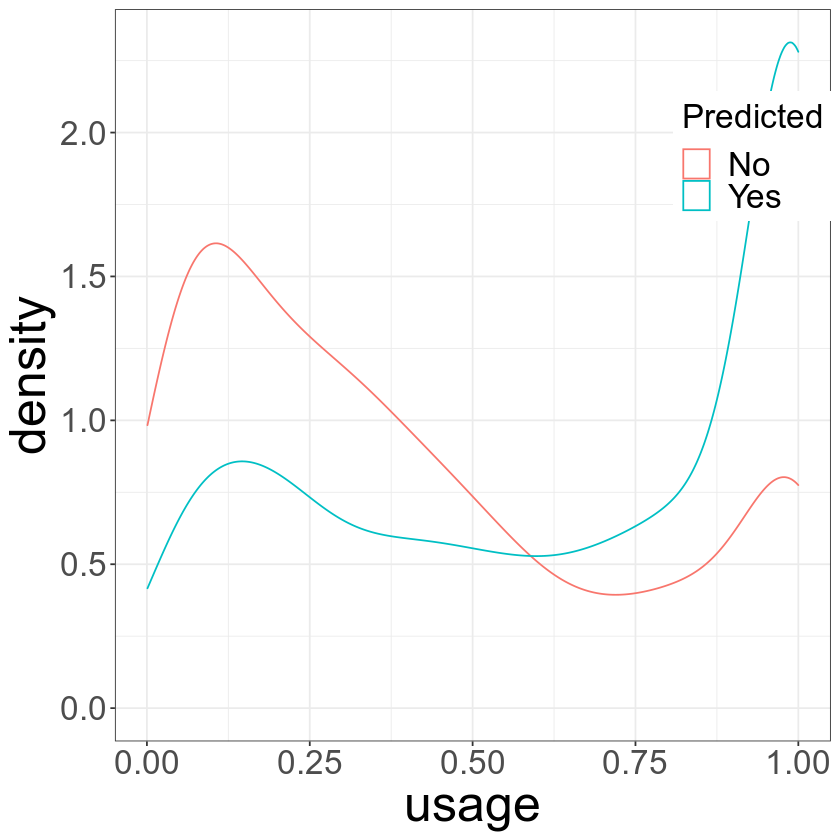

In [5]:
usage_recall = read.table('../K562/Control_stat/Stat.usage.recall.txt',header=T)
ggplot(data=usage_recall,aes(x=usage,group=Predicted,colour=Predicted))+geom_density()+
theme_bw()+
theme(legend.position = c(0.89,0.8))+
theme(plot.title = element_text(hjust = 0.5,size=30)) + 
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))

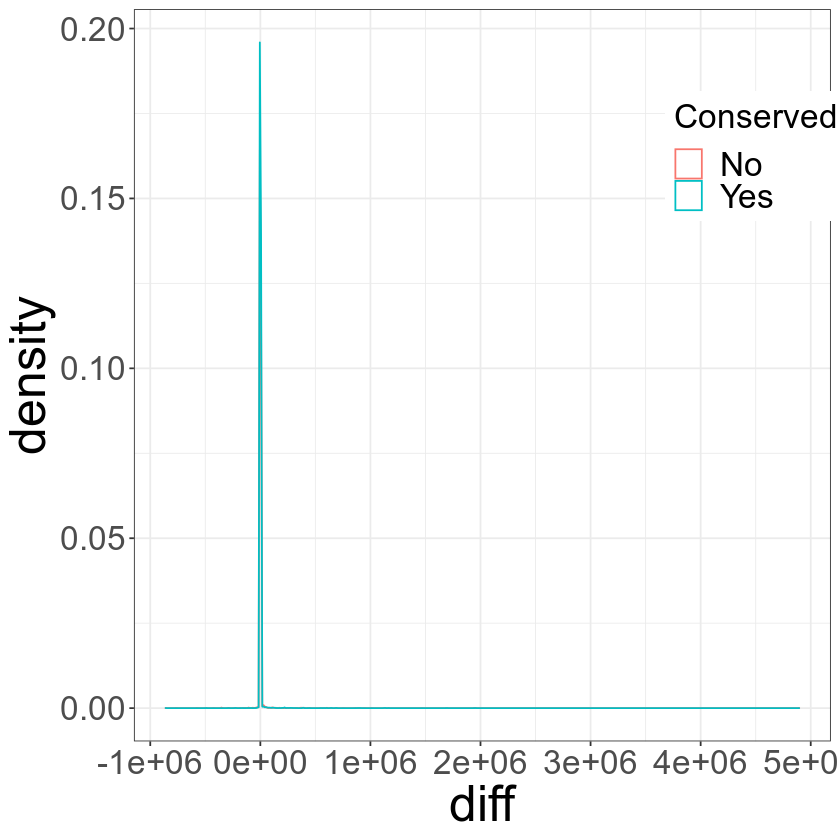

In [6]:
cov_diff = read.table('BL6_stat/Stat.conserved.diff.txt',header=T)
ggplot(data=cov_diff,aes(x=diff,group=Conserved,colour=Conserved))+geom_density()+
theme_bw()+
theme(legend.position = c(0.89,0.8))+
theme(plot.title = element_text(hjust = 0.5,size=30)) + 
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))

In [7]:
(properties.tab <- with(cov_diff,table(Conserved,Predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))

         Predicted
Conserved   No  Yes
      No   354 3924
      Yes  544 7258

,No,Yes,Total
No,354,3924,4278
Yes,544,7258,7802
Total,898,11182,12080


In [8]:
biotype_diff = read.table('../K562/Control_stat/Stat.biotype.diff.txt',header=T)

In [9]:
(properties.tab <- with(biotype_diff,table(Biotype,Predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))

                                    Predicted
Biotype                                No  Yes
  intergenic                            0    5
  lncRNA                               45   58
  misc_RNA                              1    1
  processed_pseudogene                  1   14
  protein_coding                     1179 2291
  transcribed_processed_pseudogene      1    1
  transcribed_unitary_pseudogene        1    1
  transcribed_unprocessed_pseudogene    1    1

,No,Yes,Total
intergenic,0,5,5
lncRNA,45,58,103
misc_RNA,1,1,2
processed_pseudogene,1,14,15
protein_coding,1179,2291,3470
transcribed_processed_pseudogene,1,1,2
transcribed_unitary_pseudogene,1,1,2
transcribed_unprocessed_pseudogene,1,1,2
Total,1229,2372,3601


In [10]:
pastype_diff = read.table('../K562/Control_stat/Stat.pas_type.diff.txt',header=T)

In [11]:
(properties.tab <- with(pastype_diff,table(pas_type,Predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))

            Predicted
pas_type       No  Yes
  intergenic    0    4
  LE          887 1930
  ncRNA        50   76
  Overlap       2    0
  UR          290  362

,No,Yes,Total
intergenic,0,4,4
LE,887,1930,2817
ncRNA,50,76,126
Overlap,2,0,2
UR,290,362,652
Total,1229,2372,3601


In [12]:
plotPASCoverage <- function(pas,data){
    if(is.numeric(pas)){
        df =  data.frame(position = 1:1001,coverage = as.vector(as.matrix(data[pas,10:1010])))
    }
    else{
        cov = subset(data,data$V1 == pas)[,10:1010]
        df = data.frame(position = 1:1001,coverage = as.vector(as.matrix(cov)))
    }
    print(pas)
    p = ggplot(data=df,aes(x=position,y=log(coverage+1)))+
    geom_line()+
    labs(title=paste("Coverage of PAS ",pas,sep=''))+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0),
          legend.title=element_blank(),
          plot.title = element_text(size=15,face = "bold",hjust = 0.5),
          legend.text=element_text(size=11,color="black",face="bold"))
    print(p)
}

In [13]:
coverage= read.table('coverage_data/Finetune.thle2_control.usage.txt',skip=1)

[1] "chr3:194138603:+"


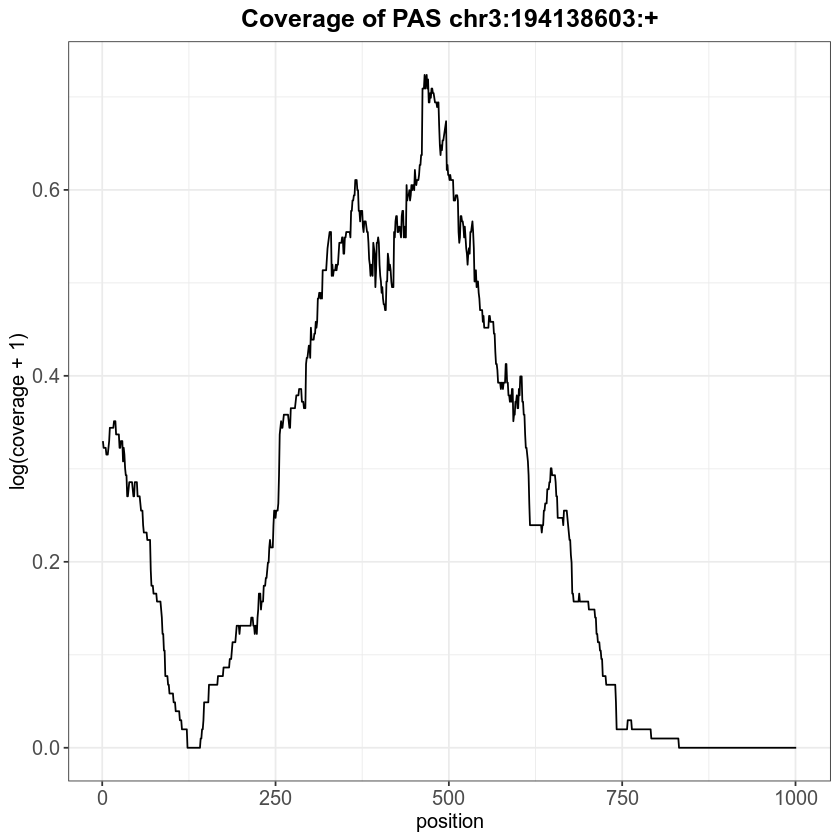

In [14]:
plotPASCoverage('chr3:194138603:+',coverage)

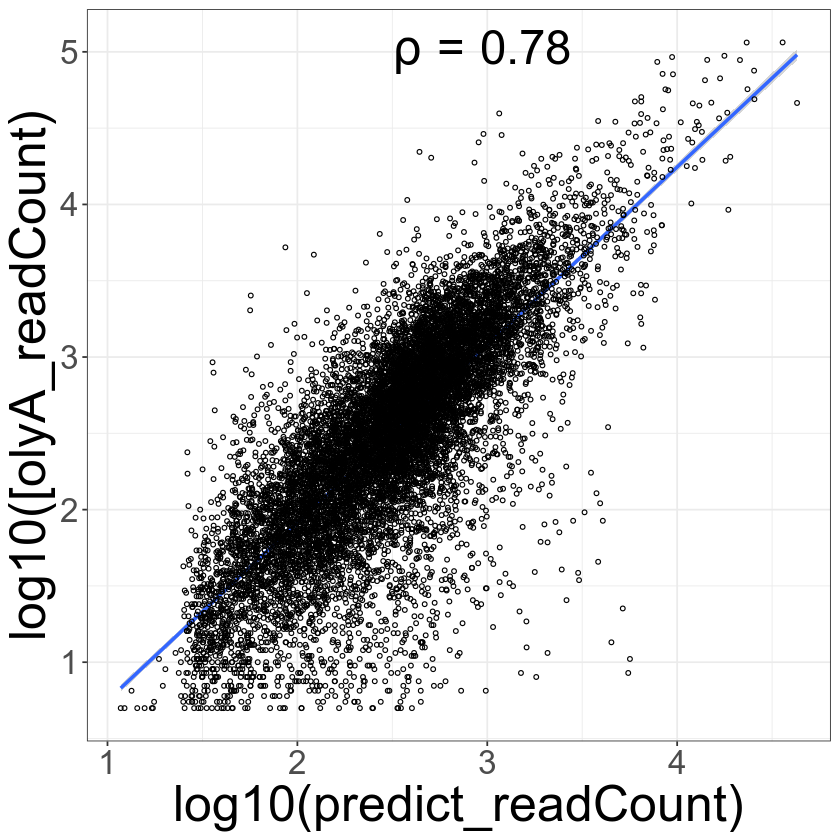

In [15]:
threshold = -5
data= read.table('train.bl6.mle.linear',header=TRUE)
#data = data[which(data$predict<0.1 & data$polyA_read<0.1),]
#data = data[which(data$predict>threshold & data$predict<4),]
#ggplot(data= data, aes(x =predict, y = polyA)) +
ggplot(data= data, aes(x =log10(predict_readCount), y = log10(polyA_readCount))) + 
theme_bw()+
geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) + #绘制回归直线
geom_point(size=1,shape=1) +
#stat_poly_eq(aes(label = paste( ..rr.label.., sep = '~~~~')), formula = y ~ x, parse = T,
          #  size=8,label.x = 0.5,label.y = 1) +
stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 2.5, label.y = 5)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))+
labs(x="log10(predict_readCount)",y="log10([olyA_readCount)")

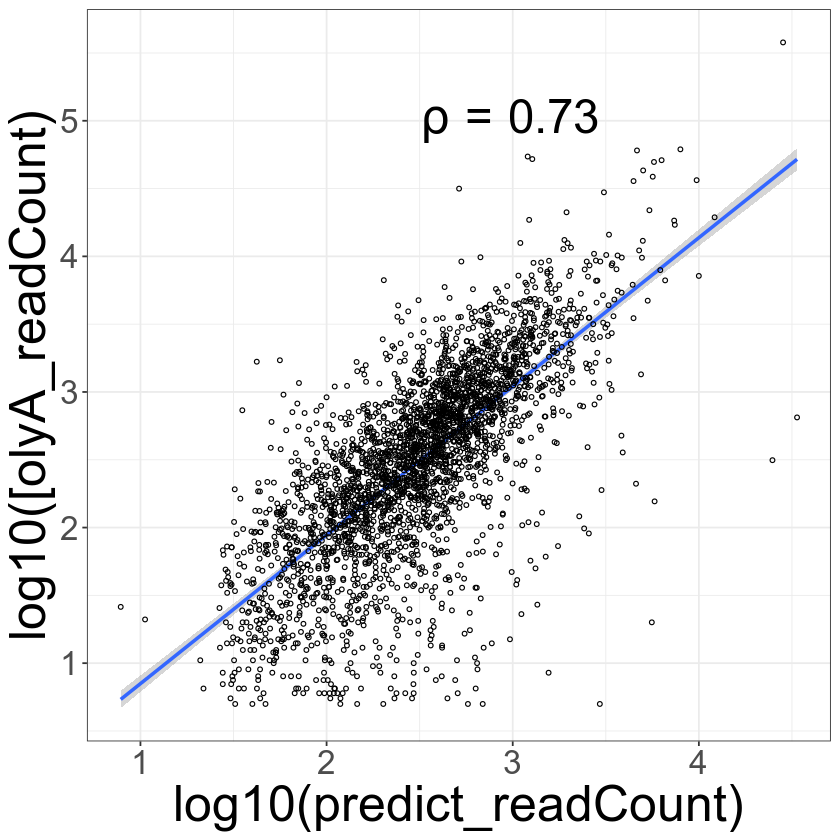

In [16]:

data= read.table('valid.bl6.mle.linear',header=TRUE)
#data = data[which(data$predict<0.1 & data$polyA_read<0.1),]
#data = data[which(data$predict>0),]
#ggplot(data= data, aes(x =predict, y = polyA)) +
ggplot(data= data, aes(x =log10(predict_readCount), y = log10(polyA_readCount))) + 
theme_bw()+
geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) + #绘制回归直线
geom_point(size=1,shape=1) +
#stat_poly_eq(aes(label = paste( ..rr.label.., sep = '~~~~')), formula = y ~ x, parse = T,
          #  size=8,label.x = 0.5,label.y = 1) +
stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 2.5, label.y = 5)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))+
labs(x="log10(predict_readCount)",y="log10([olyA_readCount)")

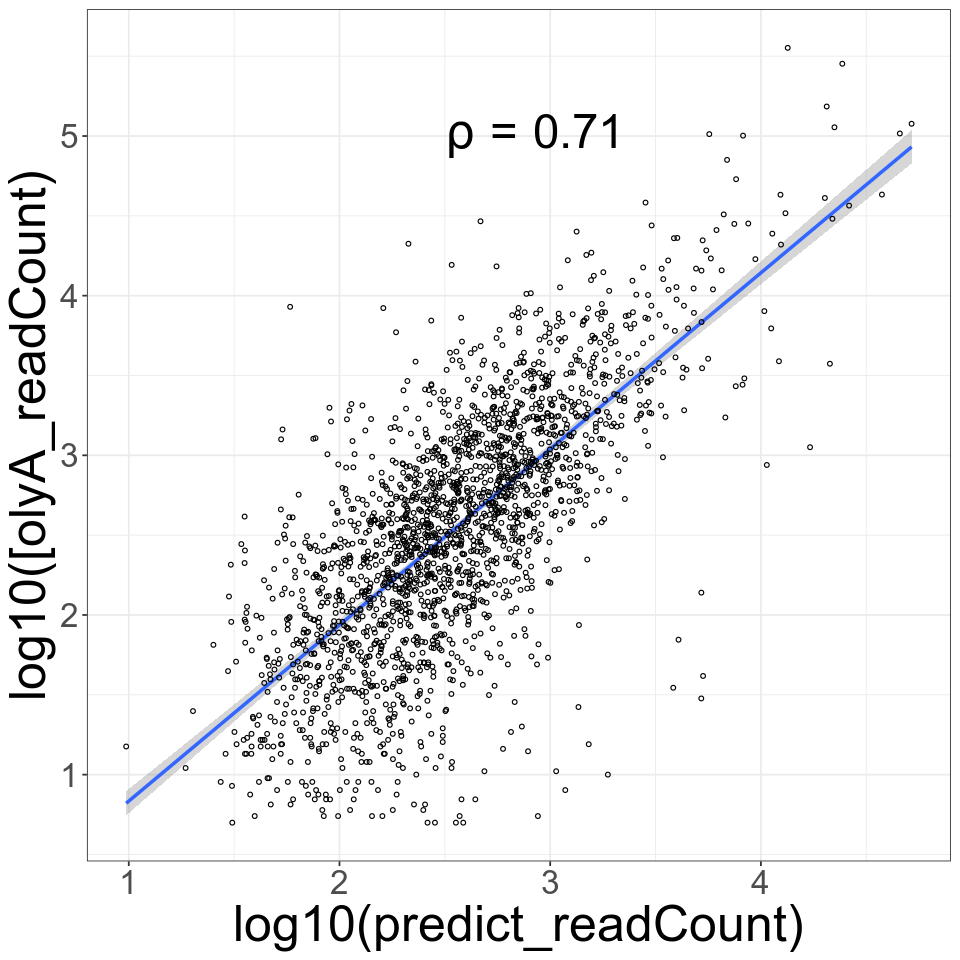

In [103]:

data= read.table('valid.k562.mle.linear',header=TRUE)
#data = data[which(data$predict<0.1 & data$polyA_read<0.1),]
#data = data[which(data$predict>0),]
#ggplot(data= data, aes(x =predict, y = polyA)) +
ggplot(data= data, aes(x =log10(predict_readCount), y = log10(polyA_readCount))) + 
theme_bw()+
geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) + #绘制回归直线
geom_point(size=1,shape=1) +
#stat_poly_eq(aes(label = paste( ..rr.label.., sep = '~~~~')), formula = y ~ x, parse = T,
          #  size=8,label.x = 0.5,label.y = 1) +
stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 2.5, label.y = 5)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))+
labs(x="log10(predict_readCount)",y="log10([olyA_readCount)")

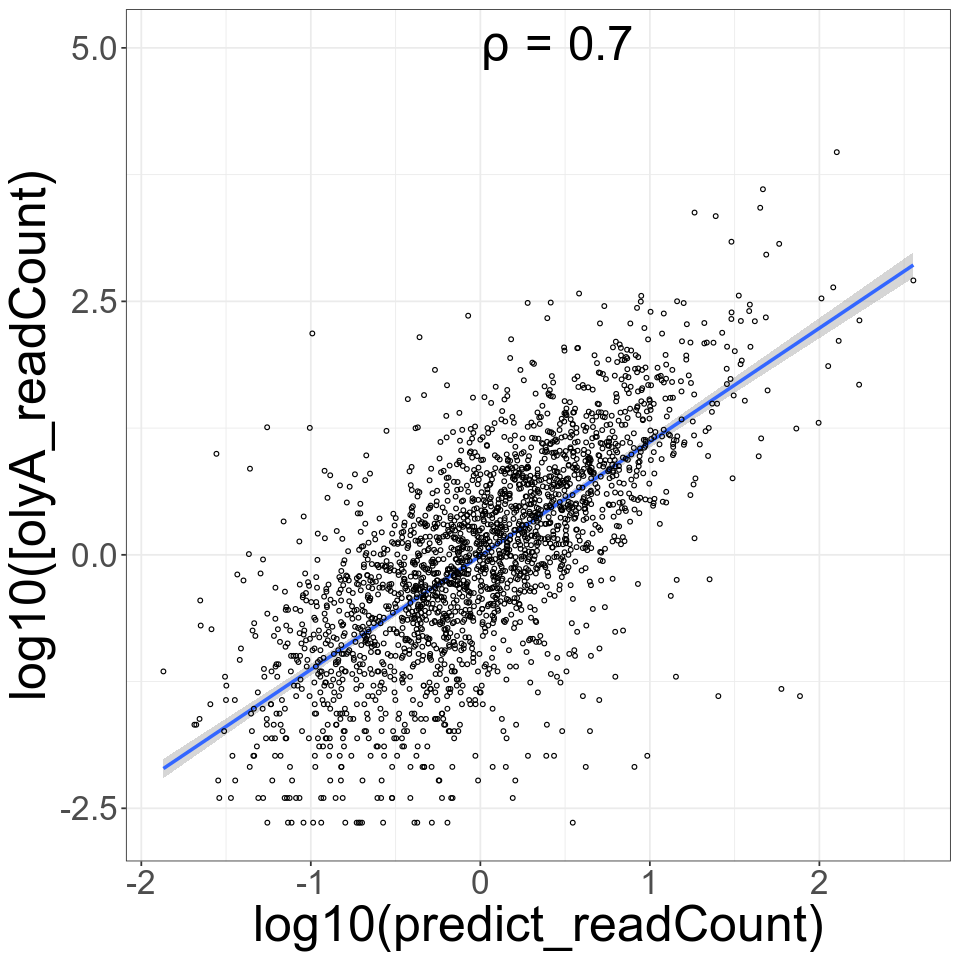

In [101]:
data= read.table('valid.Regression.f_snu398.shift16.1001',header=TRUE)
#data = data[which(data$polyA>-2),]
#data = data[which(data$predict>-1.9),]
ggplot(data= data, aes(x =predict, y = polyA)) +
#ggplot(data= data, aes(x =log10(predict_readCount), y = log10(polyA_readCount))) + 
theme_bw()+
geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) + #绘制回归直线
geom_point(size=1,shape=1) +
#stat_poly_eq(aes(label = paste( ..rr.label.., sep = '~~~~')), formula = y ~ x, parse = T,
          #  size=8,label.x = 0.5,label.y = 1) +
stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 0, label.y = 5)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))+
labs(x="log10(predict_readCount)",y="log10([olyA_readCount)")

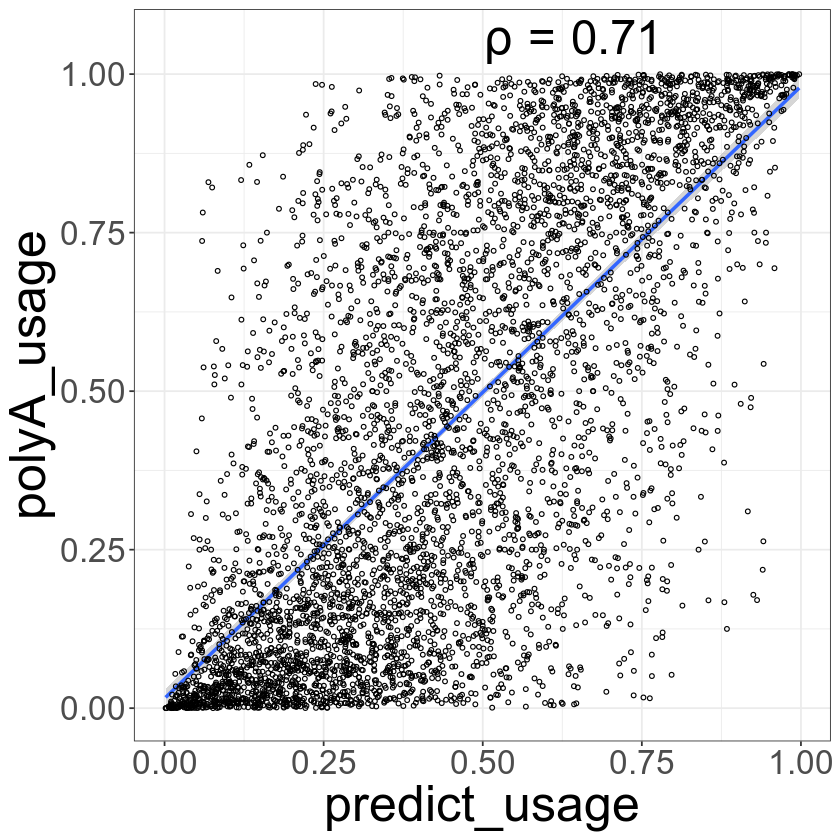

In [19]:

data= read.table('all.hepg2.mle.linear',header=TRUE)
data = data[which(data$pas_num>1),]
#ggplot(data= data, aes(x =predict, y = polyA)) +
ggplot(data= data, aes(x =predict_usage, y = polyA_usage)) + 
theme_bw()+
geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) + #绘制回归直线
geom_point(size=1,shape=1) +
#stat_poly_eq(aes(label = paste( ..rr.label.., sep = '~~~~')), formula = y ~ x, parse = T,
          #  size=8,label.x = 0.5,label.y = 1) +
stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 0.5, label.y = 1.05)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))+
labs(x="predict_usage",y="polyA_usage")

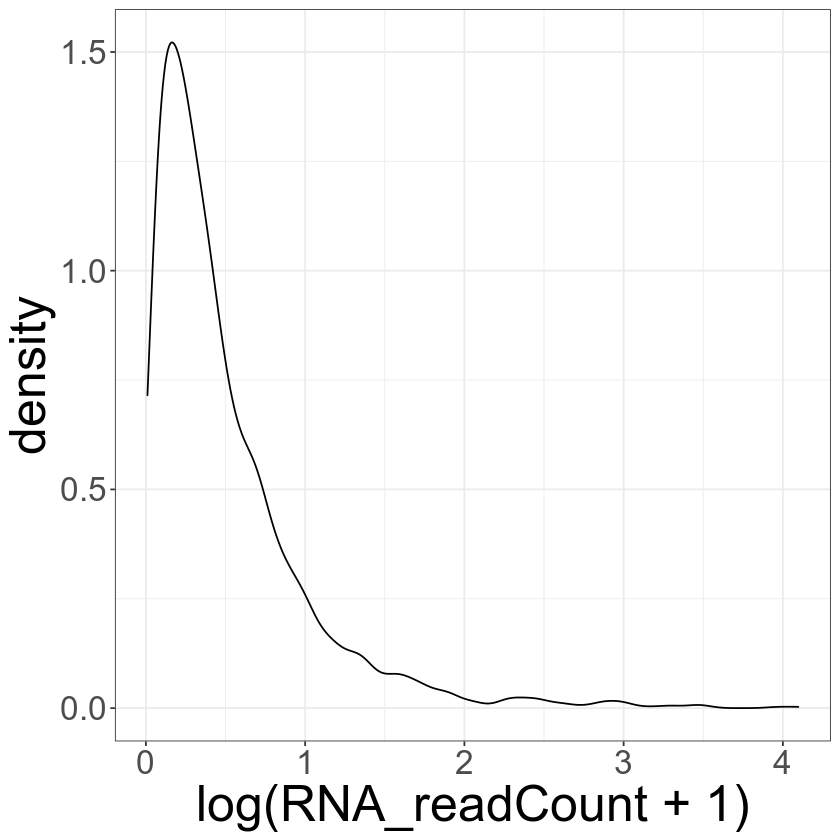

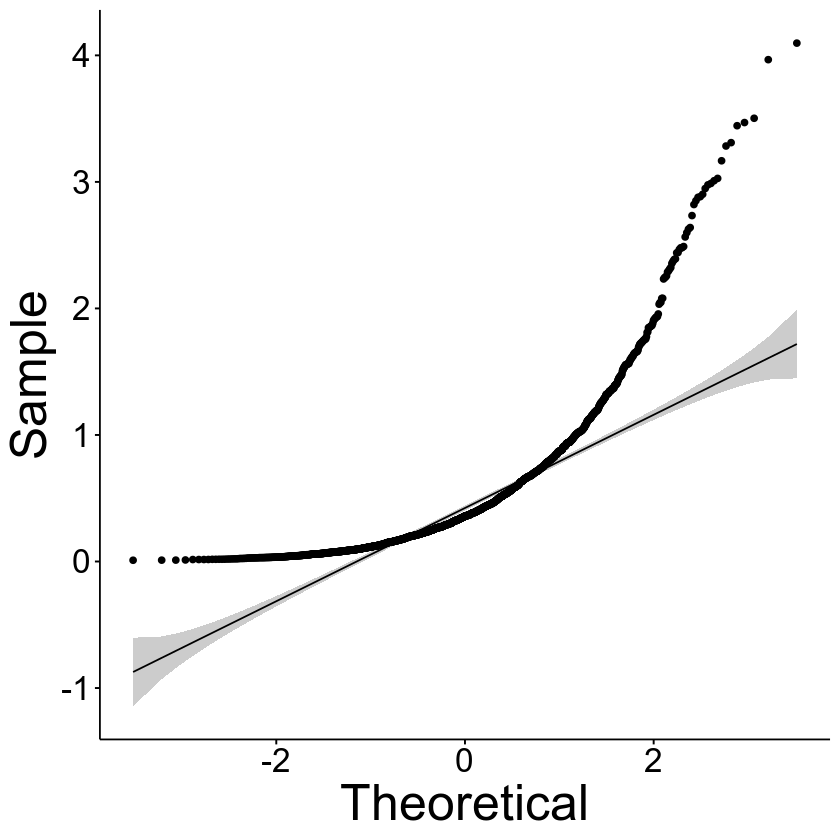

In [20]:
#data= read.table('train.mle.linear',header=TRUE)
#ggplot(data=data,aes(x=log(polyA_readCount)))+geom_density()+
data= read.table('test',header=TRUE)
ggplot(data=data,aes(x=log(RNA_readCount+1)))+geom_density()+
theme_bw()+
theme(legend.position = c(0.89,0.8)) +
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))
library(ggpubr)
ggqqplot(log(data$RNA_readCount+1))+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))


`geom_smooth()` using formula 'y ~ x'



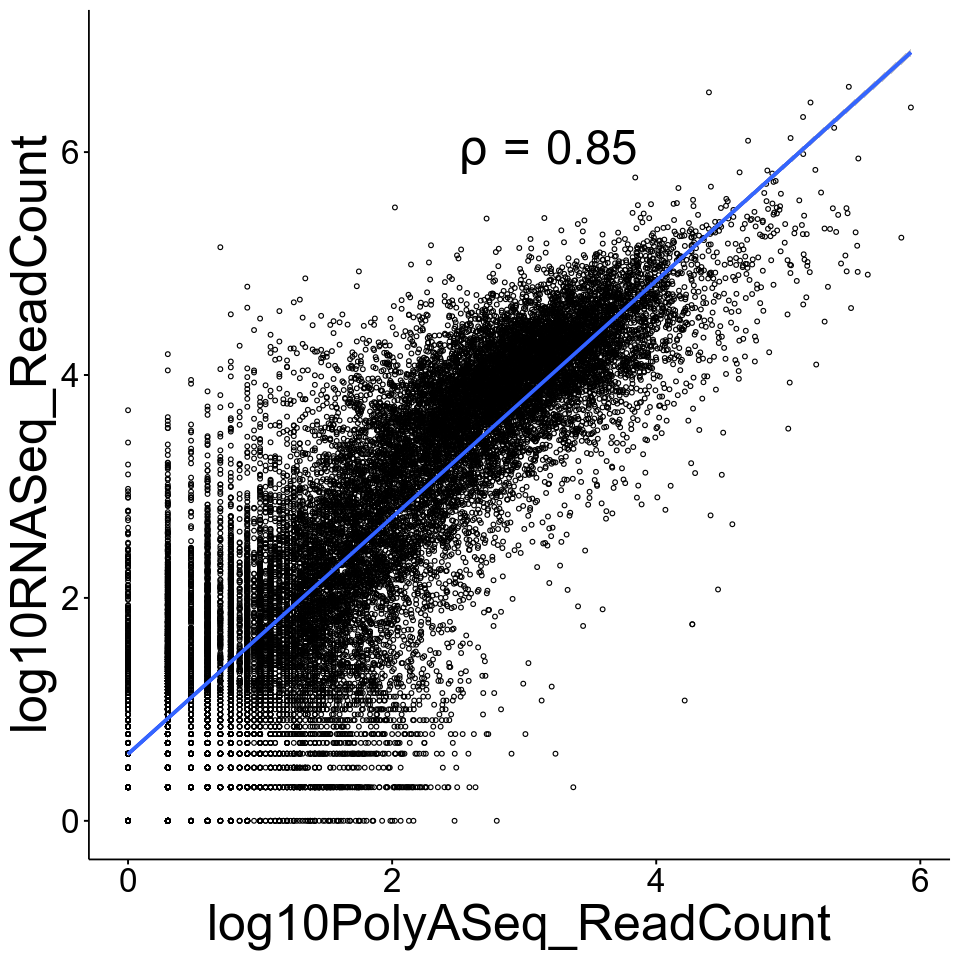

In [21]:
options(repr.plot.width=8, repr.plot.height=8)
data= read.table('Coor.txt',header=TRUE)
sp <- ggscatter(data, x ='log10PolyASeq_ReadCount', y = 'log10RNASeq_ReadCount',
                 shape = 1,size=1,
                 add = "reg.line",  # Add regressin line
                 add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
                 conf.int = TRUE, # Add confidence interval
                )+geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) 
sp + stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 2.5, label.y = 6)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))

In [22]:
library(devtools)
data= read.table('usage_data/test',header=TRUE)
ggplot(data= data, aes(x =log10(RNA_RPM), y = log10(polyA_RPM))) + 
#ggplot(data= data, aes(x =log2(RNA_readCount), y = log2(polyA_readCount))) + 
geom_point(size=1,shape=1) +
theme_bw()+
geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) + #绘制回归直线

#stat_poly_eq(aes(label = paste( ..rr.label.., sep = '~~~~')),formula = y ~ x, parse = T,
 #           size=8,label.x = 0.5,label.y = 1) +
stat_cor(method = "spearman", cor.coef.name = "rho",label.x = 1.5, label.y = 4)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))+
labs(x="log2(RNA_RPM)")

Warning message in file(file, "rt"):
“cannot open file 'usage_data/test': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data= read.table('usage_data/test3',header=TRUE)
sp <- ggscatter(data, x ='log10RNA_RPM', y = 'log10polyA_RPM',
                 shape = 1,size=1,
                 add = "reg.line",  # Add regressin line
                 add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
                 conf.int = TRUE, # Add confidence interval
                )+geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) 
sp + stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 1.5, label.y = 4)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data= read.table('usage_data/test3',header=TRUE)
sp <- ggscatter(data, x ='RNA_usage', y = 'polyA_usage',
                 shape = 1,size=1,
                 add = "reg.line",  # Add regressin line
                 add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
                 conf.int = TRUE, # Add confidence interval
                )+geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) 
sp + stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 0.5, label.y = 1)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data= read.table('Coor2.txt',header=TRUE)
sp <- ggscatter(data, x ='log10old_readCount', y = 'log10new_readCount',
                 shape = 1,size=1,
                 add = "reg.line",  # Add regressin line
                 add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
                 conf.int = TRUE, # Add confidence interval
                )+geom_smooth(method = 'lm', formula = y ~ x,fullrange = T) 
sp + stat_cor(aes(label = paste(..r.label.., sep = "~`,`~")),
              size=10,method = "spearman", cor.coef.name = "rho",label.x = 2.5, label.y = 6)+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
      legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
cov = read.table('usage_data/Coverage.Tcp1')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Zfp800')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Fbxo42')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=log(coverage)))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov[4250:4260]

In [ ]:
cov = read.table('usage_data/Coverage.Pole4')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=log(coverage)))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Syde1')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Hnrnph3')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov[900:1000]

In [ ]:
cov = read.table('usage_data/Coverage.Plk2')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Cops3')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.C2cd5')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Ccnl1')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=log(coverage)))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Atp5b')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=log(coverage)))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov = read.table('usage_data/Coverage.Mtf1')
df = data.frame(position = 1:ncol(cov),coverage = as.vector(as.matrix(cov)))
 p = ggplot(data=df,aes(x=position,y=coverage))+
    geom_line()+
    theme_bw()+
    theme(axis.title=element_text(size=12),
          axis.text=element_text(size=12,vjust=0.5,hjust=0.5,angle=0))
    print(p)

In [ ]:
cov[380:390]

In [ ]:
RNASeqplot = function(polyASeq_Reads,bins,depth){
    p1 = ggplot(data=polyASeq_Reads,aes(x=log10(Upstream_readCouunt/depth*1e6)))+geom_histogram(fill="orange",bins = bins)+
    theme_bw()+
    xlab('log10(RNASeq_TPM)')+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20))


    cat = cut(polyASeq_Reads$Upstream_readCouunt/depth*1e6, breaks=c(-Inf,0.1,0.5,1,5,10,Inf),
        labels = c("<0.1","0.1-0.5","0.5-1","1-5","5-10",">10"))
    p2 = ggplot(data=data.frame(cat),aes(factor(cat), fill=factor(cat)))+geom_bar()+
    geom_text(size=6,aes(label=scales::percent(after_stat(prop)),group=1),stat='count',nudge_y=0.125) +
    theme_bw()+
    xlab('RNASeq_TPM')+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
           legend.title = element_blank(),legend.position = "none")
    plot_grid(p1,p2)
    }

In [ ]:
polyASeqplot = function(polyASeq_Reads,bins,depth){
    p1 = ggplot(data=polyASeq_Reads,aes(x=log10(PolyASeq_readCount/depth*1e6)))+
    geom_histogram(fill="orange",bins = bins)+
    theme_bw()+
    xlab('log10(PolyASeq_TPM)')+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20))


    cat = cut(polyASeq_Reads$PolyASeq_readCount*2,breaks=c(-Inf,2,5,10,15,20,Inf),
        labels = c("<2","2-5","5-10","10-15","15-20",">20"))
    p2 = ggplot(data=data.frame(cat),aes(factor(cat), fill=factor(cat)))+geom_bar()+
    geom_text(size=6,aes(label=scales::percent(after_stat(prop)),group=1),stat='count',nudge_y=0.125) +
    theme_bw()+
    xlab('PolyASeq_RC')+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title = element_blank(),legend.position = "none")
    plot_grid(p1,p2)
}

In [ ]:
bl6_data = read.table('../Split_BL6_PolyARead/usage_data/bl6.pAs.usage.txt',header=TRUE)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
polyASeqplot(bl6_data,40,35447737)

In [ ]:
RNASeqplot(bl6_data,40,155125974)

In [ ]:
k562_data = read.table('../Split_BL6_PolyARead/usage_data/K562_Control.pAs.usage.txt',header=TRUE)

In [ ]:
polyASeqplot(k562_data,40,3275611)

In [ ]:
RNASeqplot(k562_data,40,184242893)

In [ ]:
# volcano is a numeric matrix that ships with R
bl6_volcano = as.matrix(read.table('../Split_BL6_PolyARead/usage_data/bl6.pAs.volcano.txt'))
fig <- plot_ly(z = ~bl6_volcano)
fig <- fig %>% add_surface()

fig

In [ ]:
k562_volcano = as.matrix(read.table('../Split_BL6_PolyARead/usage_data/K562_ZRANB2.pAs.volcano.txt'))
# volcano is a numeric matrix that ships with R
fig <- plot_ly(z = ~k562_volcano)
fig <- fig %>% add_surface()

fig

In [ ]:
install.packages('plotly')

In [ ]:
volcano

In [ ]:
histplot = function(data,bins){
    p1 = ggplot(data=data,aes(x=usage))+
    geom_histogram(fill="orange",breaks=seq(0, 1, by=0.05),)+
    #geom_text(size=6,aes(label=..count..),stat='count',nudge_y=0.125) +
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.1),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20))
    print(p1)
    }

In [ ]:
bl6_data = read.table('../Split_BL6_PolyARead/usage_data/K562_ZRANB2.pAs.multipAs.usage.txt',header=TRUE)
histplot(bl6_data,25)

In [ ]:
k562_data = read.table('../Split_BL6_PolyARead/usage_data/K562_Control.pAs.pasPerGene.txt',header=TRUE)
ggplot(k562_data, aes(x=cutoff)) +
geom_bar(aes(y=pas_num,fill='pAs number'), size=2,stat = "identity",)+
geom_bar(aes(y=gene_num,fill='gene number'), size=2,stat = "identity")+
scale_color_manual(values=c("#999999", "#E69F00"))+
geom_text(size=5,stat="identity",aes(y=pas_num,label=pas_num), vjust=-0.5)+
geom_text(size=5,stat="identity",aes(y=gene_num,label=gene_num), vjust=-0.5)+
theme_bw()+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title = element_blank(),legend.position=c(0.9,0.93),legend.text=element_text(size=20))+
ylab('Count')

ggplot(k562_data, aes(x=cutoff)) +
geom_bar(aes(y=pas_per_gene,fill='pAs number per gene'), size=2,stat = "identity",)+
scale_color_manual(values=c("#999999"))+
geom_text(size=5,stat="identity",aes(y=pas_per_gene,label= sprintf("%.3f",pas_per_gene)), vjust=-0.5)+
theme_bw()+
theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title = element_blank(),legend.position=c(0.9,0.93),legend.text=element_text(size=20))+
ylab('Count')

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.predict.multipAs.usage.txt',header=TRUE)
ggplot(data=data,aes(x=usage,fill=mappedToGroundTruth))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.85,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
data =  data[ which(data$pas_type=="ncRNA"), ]
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
data =  data[ which(data$pas_type=="intergenic"), ]
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
data =  data[ which(data$pas_type=="UR"), ]
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
data =  data[ which(data$pas_type=="LE"), ]
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/K562_Chen.pAs.multipAs.usage.txt',header=TRUE)
(properties.tab <- with(data,table(pas_type,predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/K562_Chen.pAs.predict.multipAs.usage.txt',header=TRUE)
(properties.tab <- with(data,table(pas_type,mappedToGroundTruth)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))


In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
(properties.tab <- with(data,table(motif,predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.predict.multipAs.usage.txt',header=TRUE)
(properties.tab <- with(data,table(motif,predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
data =  data[ which(data$motif=="WithMotif"), ]
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.multipAs.usage.txt',header=TRUE)
data =  data[ which(data$motif=="NoMotif"), ]
ggplot(data=data,aes(x=usage,fill=predicted))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlab('usage')+
    scale_x_continuous(breaks = round(seq(0,1,by = 0.05),1))+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
count.data <- data.frame(
  pAs_type=c("LE","UR","ncRNA","intergenic"),
  value=c(17935,1030,2181,969)
)

# Add label position
count.data <- count.data %>%
  arrange(desc(pAs_type)) %>%
  mutate(label = sprintf("%1.2f%%",value / sum(value)*100))

count.data %>%
mutate(prop =100*value / sum(value)) -> count.data 

count.data %>%
mutate(lab.ypos = cumsum(prop) - 0.5*prop) -> count.data
count.data


ggplot(count.data, aes(x = "", y = prop, fill = pAs_type)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text_repel(aes(y = lab.ypos, label = label),,size=5, color = "white")+
  theme_void()+
theme(legend.title=element_text(size=20),legend.text=element_text(size=20))

pAs_type,value,label,prop,lab.ypos
<fct>,<dbl>,<chr>,<dbl>,<dbl>
UR,1770,10.86%,10.864895,5.432447
ncRNA,679,4.17%,4.167945,12.948867
LE,13145,80.69%,80.688724,55.377202
intergenic,697,4.28%,4.278436,97.860782


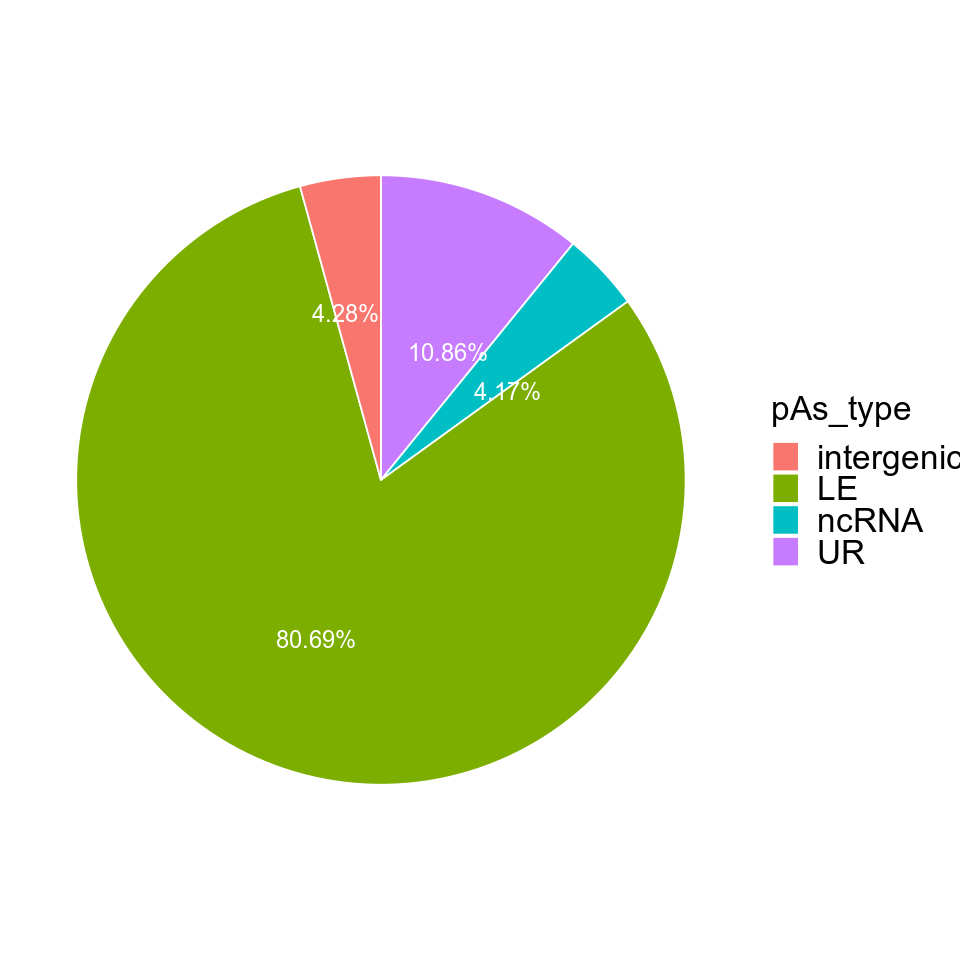

In [72]:
library(dplyr)
library(ggplot2)

count.data <- data.frame(
  pAs_type=c("LE","UR","ncRNA","intergenic"),
  value=c(13145,1770,679,697)
)

# Add label position
count.data <- count.data %>%
  arrange(desc(pAs_type)) %>%
  mutate(label = sprintf("%1.2f%%",value / sum(value)*100))

count.data %>%
mutate(prop =100*value / sum(value)) -> count.data 

count.data %>%
mutate(lab.ypos = cumsum(prop) - 0.5*prop) -> count.data
count.data


ggplot(count.data, aes(x = "", y = prop, fill = pAs_type)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text_repel(aes(y = lab.ypos, label = label),,size=5, color = "white")+

  theme_void()+
theme(legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
library(dplyr)
library(ggplot2)

count.data <- data.frame(
  pAs_type=c("LE","UR","ncRNA","intergenic"),
  value=c(11582,944,472,467)
)

# Add label position
count.data <- count.data %>%
  arrange(desc(pAs_type)) %>%
  mutate(label = percent(value / sum(value)))

count.data %>%
mutate(prop =100*value / sum(value)) -> count.data 

count.data %>%
mutate(lab.ypos = cumsum(prop) - 0.5*prop) -> count.data
count.data


ggplot(count.data, aes(x = "", y = prop, fill = pAs_type)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text_repel(aes(y = lab.ypos, label = label),,size=5, color = "white")+

  theme_void()+
theme(legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
library(dplyr)
library(ggplot2)

count.data <- data.frame(
  pAs_type=c("withMotif","noMotif"),
  value=c(19339,3959)
)

# Add label position
count.data <- count.data %>%
  arrange(desc(pAs_type)) %>%
  mutate(label = sprintf("%1.2f%%",value / sum(value)*100))

count.data %>%
mutate(prop =100*value / sum(value)) -> count.data 

count.data %>%
mutate(lab.ypos = cumsum(prop) - 0.5*prop) -> count.data
count.data


ggplot(count.data, aes(x = "", y = prop, fill = pAs_type)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text_repel(aes(y = lab.ypos, label = label), size=5,color = "white")+

  theme_void()+
theme(legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
count.data <- data.frame(
  Gene=c("single PAS","multi-PAS"),
  value=c(7603,3153)
)

# Add label position
count.data <- count.data %>%
  arrange(desc(Gene)) %>%
  mutate(label = sprintf("%1.2f%%",value / sum(value)*100))

count.data %>%
mutate(prop =100*value / sum(value)) -> count.data 

count.data %>%
mutate(lab.ypos = cumsum(prop) - 0.5*prop) -> count.data
count.data


ggplot(count.data, aes(x = "", y = prop, fill = Gene)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text_repel(aes(y = lab.ypos, label = label), size=10,color = "white")+

  theme_void()+
theme(legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
count.data <- data.frame(
  PAS=c("single PAS","multi-PAS"),
  value=c(7603,8052)
)

# Add label position
count.data <- count.data %>%
  arrange(desc(PAS)) %>%
  mutate(label = sprintf("%1.2f%%",value / sum(value)*100))

count.data %>%
mutate(prop =100*value / sum(value)) -> count.data 

count.data %>%
mutate(lab.ypos = cumsum(prop) - 0.5*prop) -> count.data
count.data


ggplot(count.data, aes(x = "", y = prop, fill = PAS)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text_repel(aes(y = lab.ypos, label = label), size=10,color = "white")+

  theme_void()+
theme(legend.title=element_text(size=20),legend.text=element_text(size=20))

In [ ]:
data = read.table('../Split_BL6_PolyARead/usage_data/BL6_REP1.pAs.predict.multipAs.usage.txt',header=TRUE)
(properties.tab <- with(data,table(motif,predicted)))
properties.tot <- cbind(properties.tab, 
                  Total = apply(properties.tab, 1, sum))
(properties.tot <- rbind(properties.tot, 
                  Total = apply(properties.tot, 2, sum)))




In [ ]:
data = read.table('usage_data/diff.txt',header=TRUE)
ggplot(data=data,aes(x=diff,fill=strand))+
    geom_density(alpha=0.25)+
    theme_bw()+
    xlim(-50,50)+
    theme(axis.text = element_text(size=20),axis.title = element_text(size=30),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

In [ ]:
summary(data[which(data$strand=="+" & abs(data$diff)<100),])

In [ ]:
summary(data[which(data$strand=="-" & abs(data$diff)<100),])

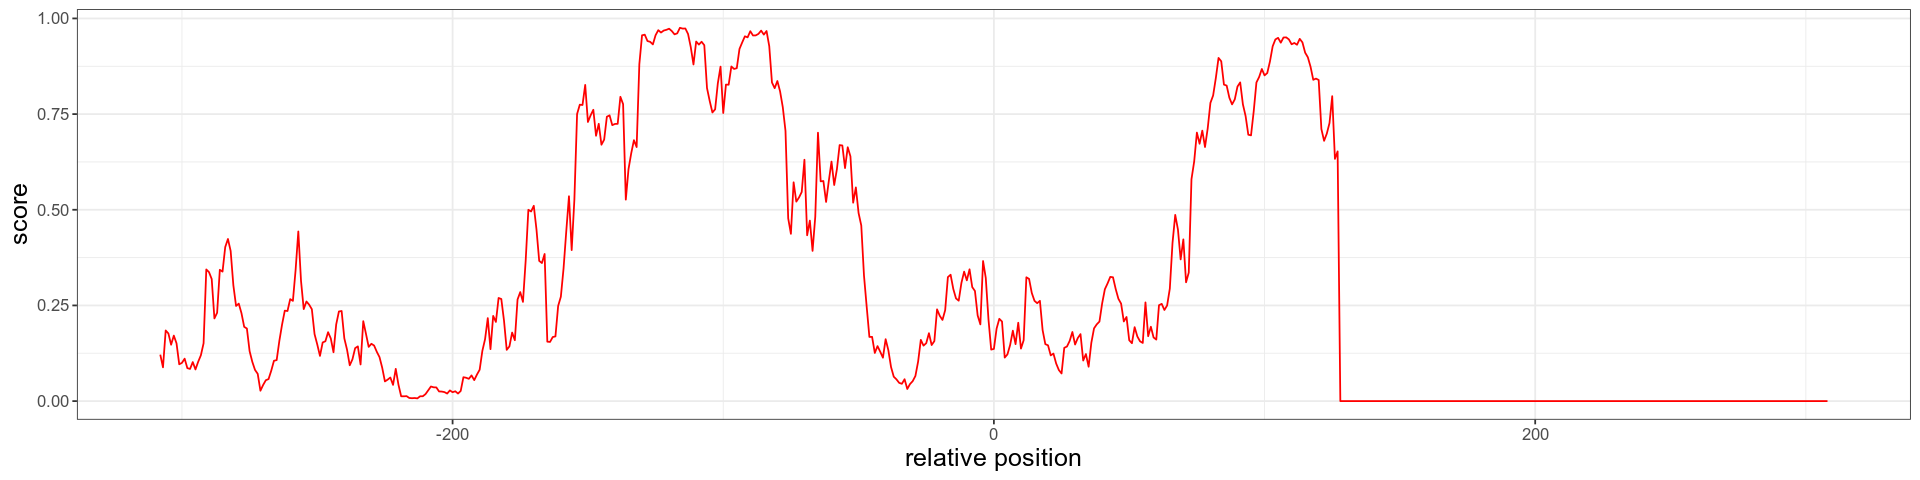

In [105]:
options(repr.plot.width=16, repr.plot.height=4)
data = read.table('usage_data/score.txt',header=TRUE)
ggplot(data=data,aes(x=position,y=score))+
    geom_line(color='red')+
    xlab('relative position')+
    theme_bw()+
    theme(axis.text = element_text(size=10),axis.title = element_text(size=15),
          legend.title=element_text(size=20),legend.text=element_text(size=20),legend.position=c(0.9,0.9))

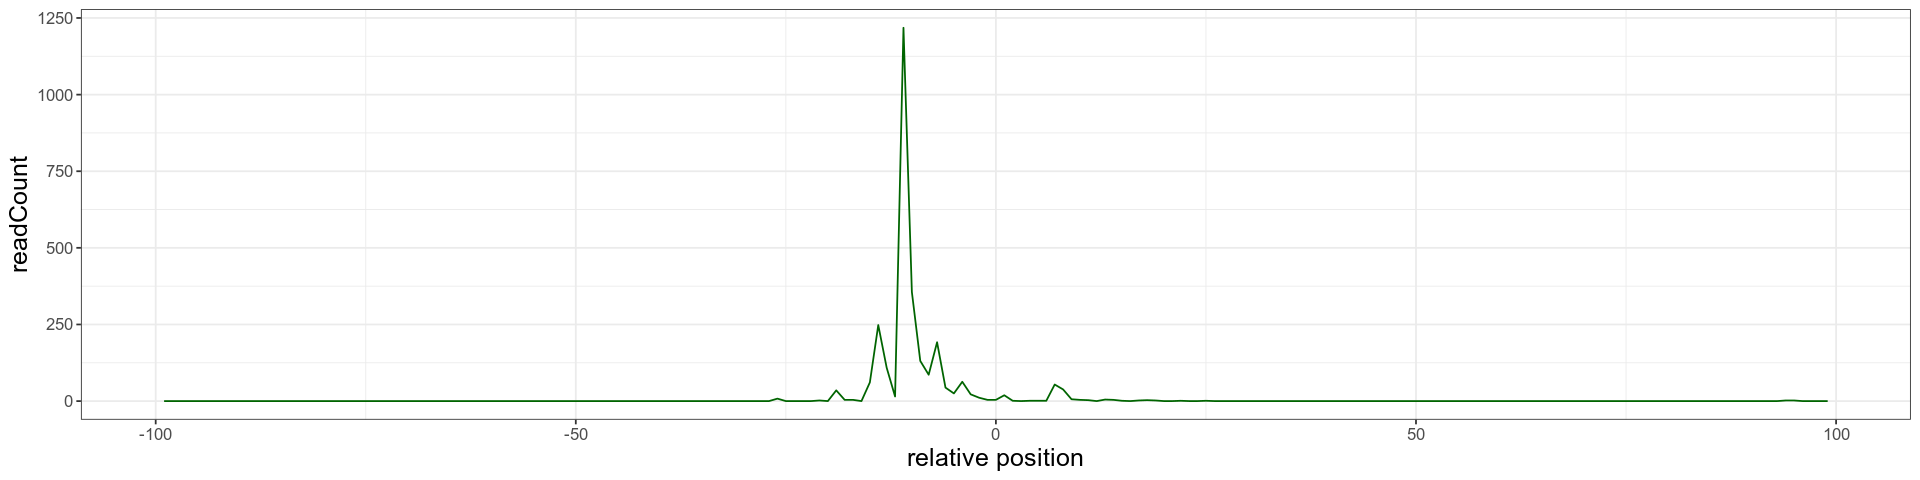

In [111]:
options(repr.plot.width=16, repr.plot.height=4)
data = read.table('../Split_BL6/polyA_seq/polyA_distribution.txt',header=TRUE)
ggplot(data=data,aes(x=position,y=readCount))+
    geom_line(color='darkgreen')+
    xlab('relative position')+
    theme_bw()+
    theme(axis.text = element_text(size=10),axis.title = element_text(size=15),
          legend.title=element_text(size=15),legend.text=element_text(size=15),legend.position=c(0.9,0.9))

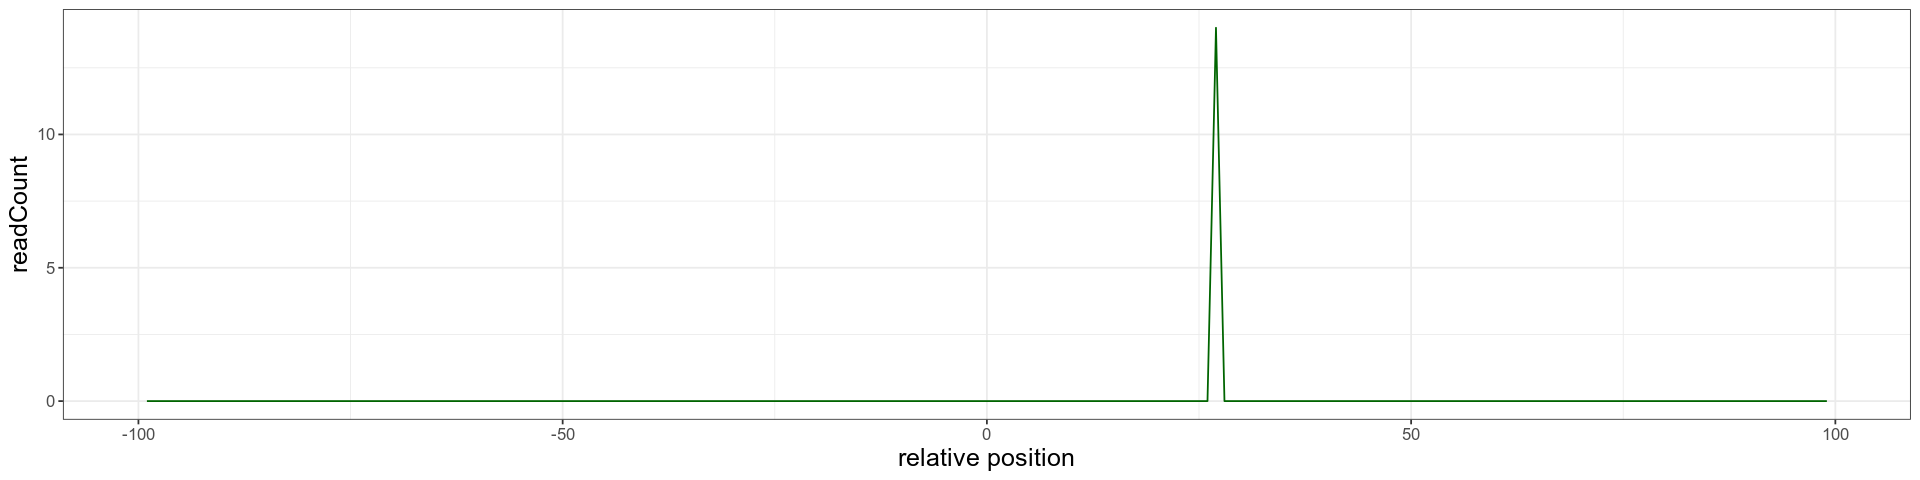

In [113]:
options(repr.plot.width=16, repr.plot.height=4)
data = read.table('../Split_BL6/polyA_seq/polyA_distribution.txt',header=TRUE)
ggplot(data=data,aes(x=position,y=readCount))+
    geom_line(color='darkgreen')+
    xlab('relative position')+
    theme_bw()+
    theme(axis.text = element_text(size=10),axis.title = element_text(size=15),
          legend.title=element_text(size=15),legend.text=element_text(size=15),legend.position=c(0.9,0.9))